# **CA3**
Fereshte Bagheri - 810100089

**Q1**: Mean Squared Error

1 - Application Of Autoencoders

a)Dimensionality Reduction: Autoencoders are excellent tools for reducing the complexity of data. They can take high-dimensional data and transform it into a lower-dimensional form. This is somewhat similar to Principal Component Analysis (PCA), but unlike PCA, autoencoders are capable of capturing non-linear dependencies between variables.

b)Anomaly Detection: Autoencoders can be trained to learn the typical patterns in the data. Once trained, they can be used to identify data points that do not conform to these typical patterns, also known as anomalies or outliers. This property is particularly useful in scenarios such as fraud detection, where the objective is to identify abnormal behavior.

c)Denoising: A special type of autoencoder, called a denoising autoencoder, has the ability to reconstruct a clean data sample from a noisy one. This is achieved by training the autoencoder to map noisy data samples to their noise-free versions. This property has found applications in various domains, including image denoising and signal processing.

2- Bluriness Of Reconstructed Images

Autoencoders work by compressing the input data into a smaller representation, known as the latent space, and then reconstructing the output from this representation.

The size of the latent space is typically much smaller than the input data, which forces the autoencoder to learn the most important features of the data. However, because the latent space is smaller, some information from the original data is inevitably lost during the compression process. This loss of information is what leads to errors in the reconstruction, often making the reconstructed images appear blurrier than the original images.

The size of the latent space plays a crucial role in this process. If the latent space is too small, the autoencoder may not be able to learn all the important features of the data, leading to higher reconstruction errors.And if the latent space is too large, the autoencoder might simply learn to copy the input to the output without learning any meaningful representations. Therefore, choosing the right size for the latent space is a key aspect of training an autoencoder. It's a trade-off between how much information to retain from the original data and how much compression is desired. This balance is typically found through experimentation and validation on a held-out dataset.

3-

In [ ]:
import matplotlib.pyplot as plt
import numpy as np, random
from keras.datasets import mnist
import tensorflow as tf
from scipy import stats
import pandas as pd

In [ ]:
def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)

In [ ]:
(_,_),(test_images, _) = mnist.load_data()
test_images = test_images.reshape(test_images.shape[0] ,-1)
test_images = test_images.astype('float32') / 255.0

In [ ]:
(_,_),(test_images, _) = mnist.load_data()
test_images = test_images.reshape(test_images.shape[0] ,-1)
test_images = test_images.astype('float32') / 255.0

In [ ]:
autoencoder = tf.keras.models.load_model('mnist_AE.h5')
reconstructed_images = autoencoder.predict(test_images)

313/313 [==============================] - 2s 5ms/step


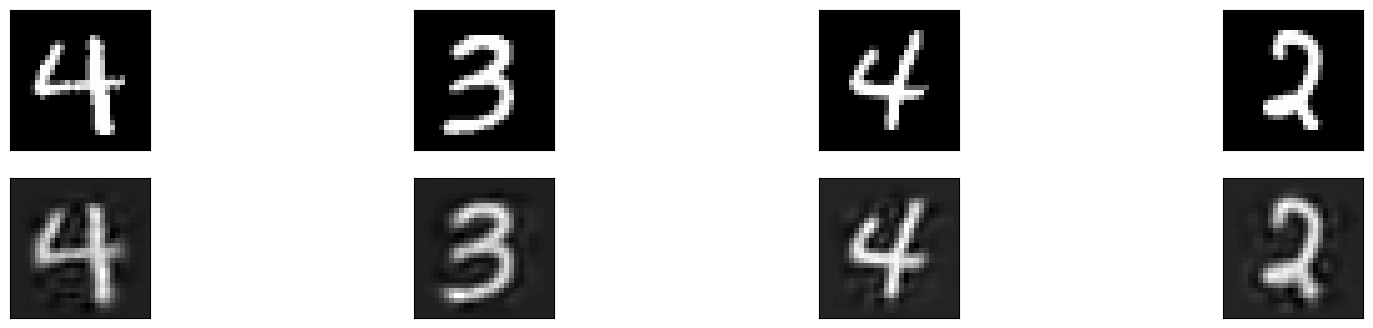

In [ ]:
n = 4
np.random.seed(810109203)
indices = np.random.choice(reconstructed_images.shape[0], size=n, replace=False)

plt.figure(figsize=(20, 4))
for i, idx in enumerate(indices):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_images[idx].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


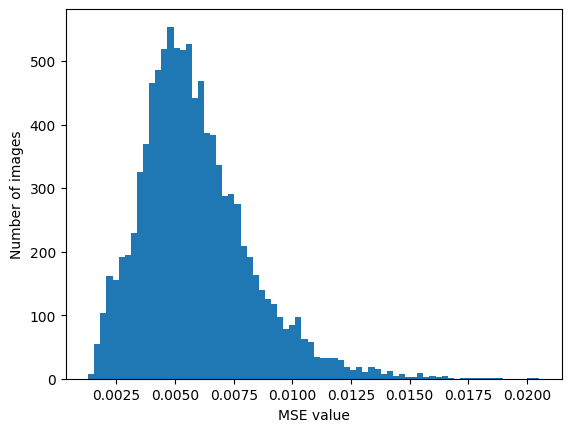

In [ ]:
def mse(original_img, reconstructed_img):
    err = np.mean((original_img - reconstructed_img) ** 2)
    return err


num = test_images.shape[0]
mse_values = [mse(test_images[i], reconstructed_images[i]) for i in range(num)]

plt.hist(mse_values, bins='auto')
plt.xlabel('MSE value')
plt.ylabel('Number of images')
plt.show()


If p-value is less than significance level, the null hypothesis can not be accepted.

In [ ]:
mean = np.mean(mse_values)
std = np.std(mse_values)

ks_statistic, p_value = stats.kstest(mse_values, cdf='norm', args=(mean, std))
print(ks_statistic)
if p_value > 0.05:
    print("The MSE values follow a normal distribution")
else:
    print("The MSE values do not follow a normal distribution")


0.07001429074637133
The MSE values do not follow a normal distribution


**Q2** : Regression & Least Squares



1-

**Outliers** are data points that are very different from the rest of the data. They can mess up the relationship we see between the variables when we do a regression analysis. This can lead to wrong predictions.

**Leverage points** are data points that can change the slope of the regression line because they have extreme values for the independent variable. This can make the regression line fit the data poorly.

both outliers and leverage points can cause problems in regression analysis. They can make our predictions less accurate. So, it's important to find and deal with these points when we analyze data.

Data points that exhibit both leverage and outlier characteristics are quite unique. These points are not only different from the rest of the data (outliers), but they also have extreme values for the independent variable(s) (leverage). This combination can significantly influence the regression model.points with both outlier and leverage characteristics can have a substantial impact on your regression analysis. They can distort the estimated relationship between the variables and reduce the accuracy of predictions1. Therefore, it’s crucial to identify and appropriately handle these points when analyzing data1.

2-

Coefficient of Determination (R²): This is a key concept in regression analysis. It tells us how well our model fits the data. R² is actually the square of the correlation coefficient ®. It shows how much of the change in the dependent variable can be explained by the independent variable. The value of R² can be anywhere from 0 to 1. A value of 0 means that our model doesn’t predict the outcome at all, while a value of 1 means our model predicts the outcome perfectly. If R² is somewhere between 0 and 1, it tells us how well the dependent variable can be predicted.

3-

main values

In [ ]:
from sklearn.linear_model import LinearRegression
# just for sure

x = np.array([ -2.3,-1.1,0.5,3.2,4.0,6.7,10.3,11.5]).reshape((-1, 1))
y = np.array([-9.6,-4.9,-4.1,2.7,5.9,10.8,18.9,20.5])

model = LinearRegression().fit(x, y)
alpha = model.intercept_
beta = model.coef_[0]
print(f"Alpha (intercept): {alpha}")
print(f"Beta (slope): {beta}")

y_pred = model.predict(x)
print(f"Predicted y-values: {y_pred}")

Alpha (intercept): -3.9000687795752143
Beta (slope): 2.176846043798833
Predicted y-values: [-8.90681468 -6.29459943 -2.81164576  3.06583856  4.8073154  10.68479971
 18.52144547 21.13366072]


In [ ]:
def calculate_coefficients(x_vals, y_vals):
    mean_x = np.mean(x_vals)
    mean_y = np.mean(y_vals)
    numerator = np.sum((x_vals - mean_x)*(y_vals - mean_y))
    denominator = np.sum((x_vals - mean_x)**2)

    slope = numerator / denominator
    intercept = mean_y - (slope * mean_x)

    return (intercept, slope)

def model_LSE(x, y):
    alpha, beta = calculate_coefficients(x, y)
    print(f"Alpha (intercept): {alpha}")
    print(f"Beta (slope): {beta}")
    y_predicted = alpha + beta*x
    return y_predicted

def calculate_r_squared(y_observed, y_predicted):
    SS_total = np.sum((y_observed - np.mean(y_observed))**2)
    SS_residual = np.sum((y_observed - y_predicted)**2)
    r_squared = 1 - (SS_residual/SS_total)
    return r_squared




x = np.array([ -2.3,-1.1,0.5,3.2,4.0,6.7,10.3,11.5])
y = np.array([-9.6,-4.9,-4.1,2.7,5.9,10.8,18.9,20.5])
y_pred = model_LSE(x, y)
print(f"Predicted y-values: {y_pred}")
print(f"r-squared: {calculate_r_squared(y, y_pred)}")

Alpha (intercept): -3.900068779575216
Beta (slope): 2.1768460437988333
Predicted y-values: [-8.90681468 -6.29459943 -2.81164576  3.06583856  4.8073154  10.68479971
 18.52144547 21.13366072]
r-squared: 0.9931142293628097


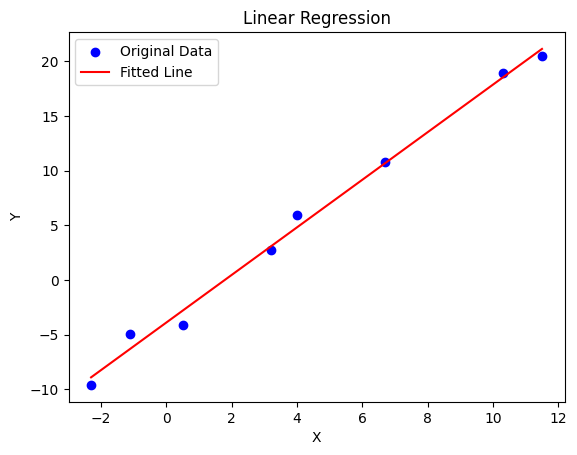

In [ ]:
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, y_pred, color='red', label='Fitted Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.show()

main values + outlier

In [ ]:
x = np.array([ -2.3,-1.1,0.5,3.2,4.0,6.7,10.3,11.5, 5.8])
y = np.array([-9.6,-4.9,-4.1,2.7,5.9,10.8,18.9,20.5, 31.3])
y_pred = model_LSE(x, y)
print(f"Predicted y-values: {y_pred}")
print(f"r-squared: {calculate_r_squared(y, y_pred)}")



Alpha (intercept): -2.1856050832539573
Beta (slope): 2.36192864635455
Predicted y-values: [-7.61804097 -4.78372659 -1.00464076  5.37256659  7.2621095  13.63931685
 22.14225997 24.97657435 11.51358107]
r-squared: 0.6943381680789323


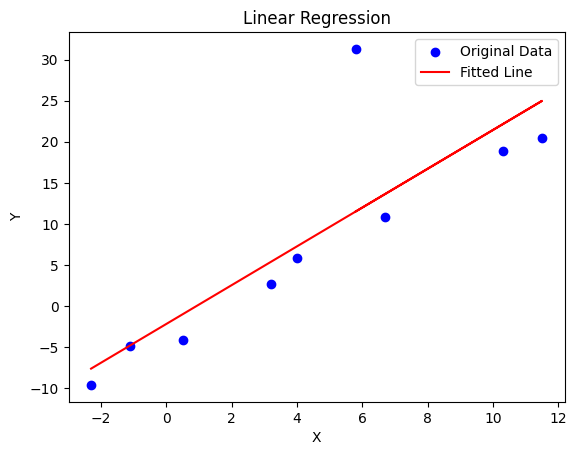

In [ ]:
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, y_pred, color='red', label='Fitted Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.show()

main values + laverage

In [ ]:
x = np.array([ -2.3,-1.1,0.5,3.2,4.0,6.7,10.3,11.5, 20.4])
y = np.array([-9.6,-4.9,-4.1,2.7,5.9,10.8,18.9,20.5, 14.1])
y_pred = model_LSE(x, y)
print(f"Predicted y-values: {y_pred}")
print(f"r-squared: {calculate_r_squared(y, y_pred)}")


Alpha (intercept): -1.4223254404202912
Beta (slope): 1.2612956572139593
Predicted y-values: [-4.32330545 -2.80975066 -0.79167761  2.61382066  3.62285719  7.02835546
 11.56901983 13.08257462 24.30810597]
r-squared: 0.7069879724740986


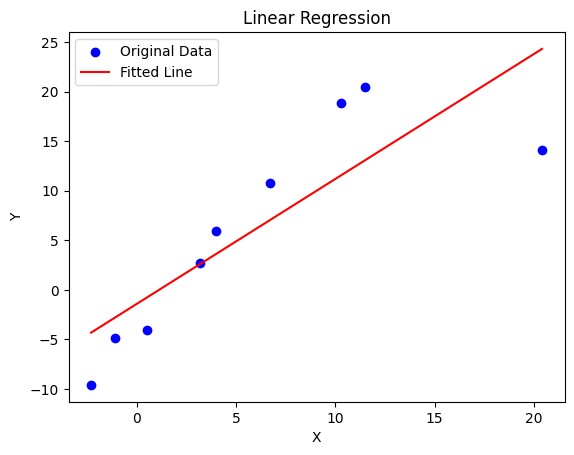

In [ ]:
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, y_pred, color='red', label='Fitted Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.show()

main values + outlier and laverage

In [ ]:
x = np.array([ -2.3,-1.1,0.5,3.2,4.0,6.7,10.3,11.5, 20.4])
y = np.array([-9.6,-4.9,-4.1,2.7,5.9,10.8,18.9,20.5, 31.3])
y_pred = model_LSE(x, y)
print(f"Predicted y-values: {y_pred}")
print(f"r-squared: {calculate_r_squared(y, y_pred)}")


Alpha (intercept): -3.0361487618247445
Beta (slope): 1.8576191514365172
Predicted y-values: [-7.30867281 -5.07952983 -2.10733919  2.90823252  4.39432784  9.40989955
 16.0973285  18.32647148 34.85928193]
r-squared: 0.9738367949787371


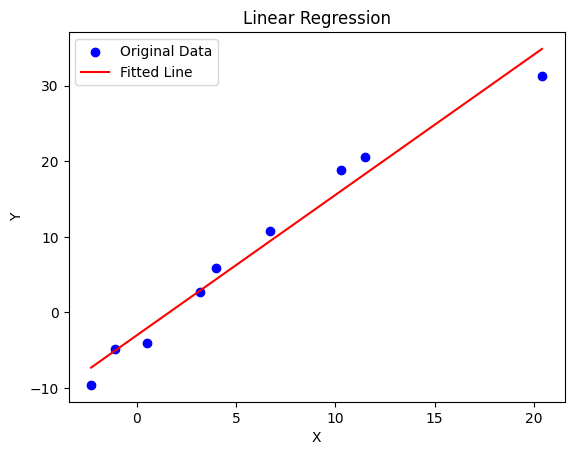

In [ ]:
plt.scatter(x, y, color='blue', label='Original Data')
plt.plot(x, y_pred, color='red', label='Fitted Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.show()

4-


 **Removing Outliers or Leverage Points**: This is the simplest solution. However, this method should be used with caution as removing data can lead to loss of important information.

**Using Robust Regression Methods**: These methods, like Huber regression, minimize a cost function that is less sensitive to outliers than the sum of squared errors.

**Transforming the Data**: In some cases, transforming the data (e.g., taking the logarithm or square root) can help reduce the impact of outliers.

**Using Non-linear Models**: If the relationship between variables is non-linear, using non-linear models can lead to more accurate predictions.

**Using Regularized Regression Methods**: Methods like Ridge or Lasso regression can help improve the performance of the regression model in the presence of outliers or leverage points.


**Q3** : Central Limit Theorem & Sampling

1-

**Mean/Median/Mode Imputation**: Replace the missing values with the mean (for continuous data), median (for ordinal data), or mode (for categorical data). This method is simple but might not be accurate if the data is not normally distributed.

**Prediction Models**: Use statistical models such as linear regression, logistic regression, or machine learning models to predict the missing values based on other data.

**K-Nearest Neighbors (KNN)**: Replace the missing values with the mean/mode/median of the K-nearest neighbors. The ‘neighbors’ are calculated using the other variables.



In [15]:
df = pd.read_csv('FIFA2020.csv', encoding = "ISO-8859-1")
print(df['pace'])

0        95.0
1        92.0
2        97.0
3        96.0
4        88.0
         ... 
21556    88.0
21557    80.0
21558     NaN
21559     NaN
21560    96.0
Name: pace, Length: 21561, dtype: float64


In [39]:
pace_mean = df['pace'].mean()
dribbling_mean = df['dribbling'].mean()

df['dribbling'].fillna(pace_mean, inplace=True)
df['pace'].fillna(pace_mean, inplace=True)
print(df['pace'])


0        95.000000
1        92.000000
2        97.000000
3        96.000000
4        88.000000
           ...    
21556    88.000000
21557    80.000000
21558    69.897002
21559    69.897002
21560    96.000000
Name: pace, Length: 21561, dtype: float64


2-

Minimum (min): The smallest value.

First Quartile (Q1): The value below which 25% of the data falls.

Second Quartile (Q2): Also called median. 50% of the data falls below this value.

Third Quartile (Q3): The value below which 75% of the data falls.

Maximum (max): The largest value.

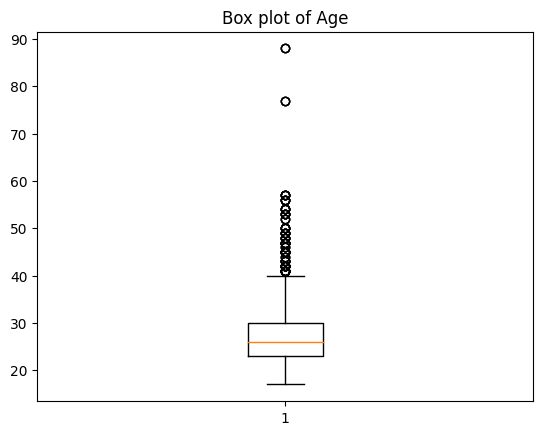

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('FIFA2020.csv', encoding = "ISO-8859-1")

# Create a box plot for the 'age' variable
plt.boxplot(df['age'].dropna())
plt.title('Box plot of Age')
plt.show()

# Calculate the quartiles and extreme values
Q1 = df['age'].quantile(0.25)
Q2 = df['age'].quantile(0.5)
Q3 = df['age'].quantile(0.75)
min_val = df['age'].min()
max_val = df['age'].max()



In [26]:
print(f"Minimum: {min_val}\nQ1: {Q1}\nQ2 (Median): {Q2}\nQ3: {Q3}\nMaximum: {max_val}")

Minimum: 17
Q1: 23.0
Q2 (Median): 26.0
Q3: 30.0
Maximum: 88


3-

A Q-Q (Quantile-Quantile) plot is a graphical tool used to assess if a dataset follows a particular theoretical distribution. It compares the quantiles of the observed data against the quantiles of the chosen theoretical distribution. If the points in the Q-Q plot fall along a straight line (approximately), it suggests that the data is distributed similarly to the theoretical distribution.

The first Q-Q plot is created for the ‘weight’ variable. This plot helps us visually assess how closely the ‘weight’ variable follows a normal distribution.

The second Q-Q plot is created for a sample of 100 values generated from a normal distribution with the same mean and standard deviation as the ‘weight’ sample. This plot serves as a reference, showing what the Q-Q plot would look like if the data was indeed normally distributed.

As we can see, the weight variable follows a normal distribution because its plot nearly falls along a straight line.

In [33]:
sample = df['weight'].dropna().sample(100, replace=False)

mean = sample.mean()
variance = sample.var()
std_dev = sample.std()
print(f"Mean: {mean}\nVariance: {variance}\nStandard Deviation: {std_dev}")


Mean: 75.01
Variance: 41.24232323232324
Standard Deviation: 6.422018625971373


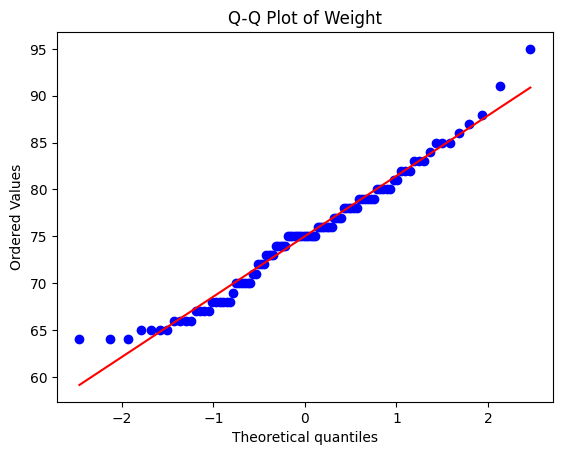

In [34]:
stats.probplot(sample, dist="norm", plot=plt)
plt.title('Q-Q Plot of Weight')
plt.show()

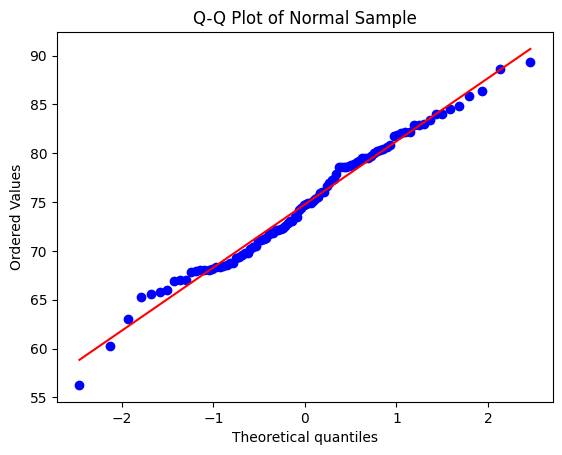

In [35]:
normal_sample = np.random.normal(mean, std_dev, 100)
stats.probplot(normal_sample, dist="norm", plot=plt)
plt.title('Q-Q Plot of Normal Sample')
plt.show()

In [36]:

statistic, p_value = stats.shapiro(sample)
print(f"Statistic: {statistic}\nP-value: {p_value}")

if p_value < 0.05:
    print("Not normal!")
else:
    print("Normal!")


Statistic: 0.9752373695373535
P-value: 0.05631524324417114
Normal!


Mean: 75.674
Variance: 52.973671342685364
Standard Deviation: 7.278301405045367



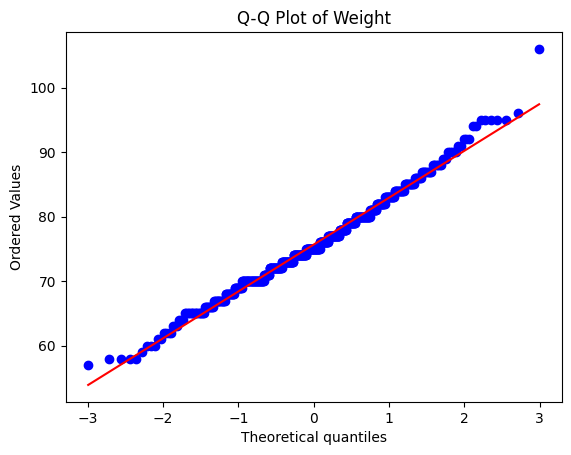

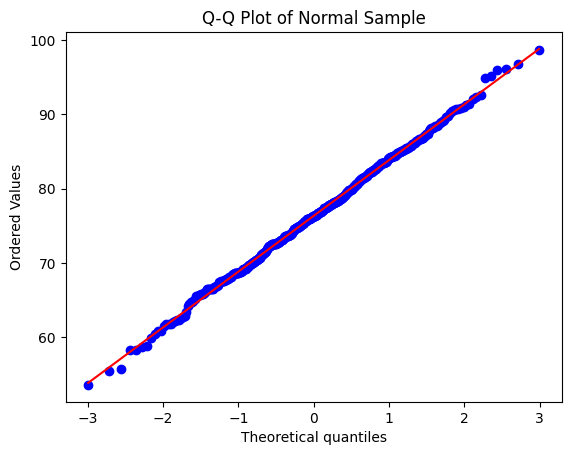

In [37]:
sample = df['weight'].dropna().sample(500, replace=False)

mean = sample.mean()
variance = sample.var()
std_dev = sample.std()
print(f"Mean: {mean}\nVariance: {variance}\nStandard Deviation: {std_dev}\n")

stats.probplot(sample, dist="norm", plot=plt)
plt.title('Q-Q Plot of Weight')
plt.show()

normal_sample = np.random.normal(mean, std_dev, 500)
stats.probplot(normal_sample, dist="norm", plot=plt)
plt.title('Q-Q Plot of Normal Sample')
plt.show()


Mean: 75.566
Variance: 50.88808804402201
Standard Deviation: 7.133588721255383



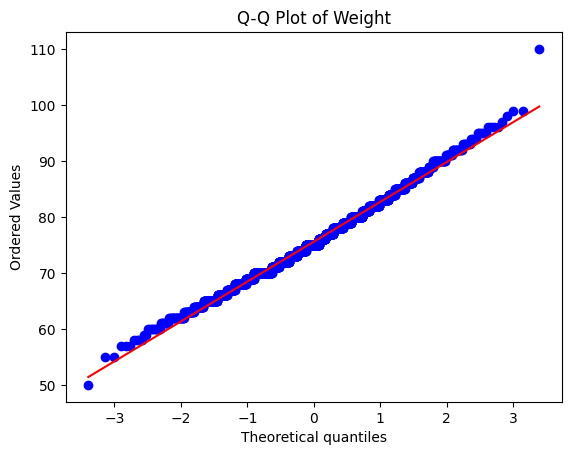

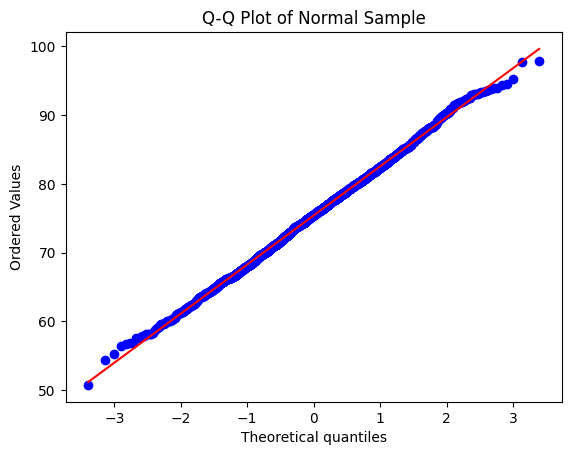

In [38]:
sample = df['weight'].dropna().sample(2000, replace=False)

mean = sample.mean()
variance = sample.var()
std_dev = sample.std()
print(f"Mean: {mean}\nVariance: {variance}\nStandard Deviation: {std_dev}\n")

stats.probplot(sample, dist="norm", plot=plt)
plt.title('Q-Q Plot of Weight')
plt.show()

normal_sample = np.random.normal(mean, std_dev, 2000)
stats.probplot(normal_sample, dist="norm", plot=plt)
plt.title('Q-Q Plot of Normal Sample')
plt.show()


As the sample size (n) grows, the Q-Q plot of the sample increasingly aligns with the reference line, indicating a stronger adherence to a normal distribution. Concurrently, the variance diminishes, further suggesting a normal distribution.

Moreover, as n increases, the mean of the sample remains relatively steady, hovering around 75-76. This stability in the mean, coupled with a decreasing test statistic, implies that the data points are becoming more concentrated around the mean.

4-
while the Shapiro-Wilk test provided evidence against the samples being normally distributed, the principles of the Central Limit Theorem suggest that the distribution of sample means would still approach a normal distribution as the sample size increases. This underscores the importance of sample size in statistical analysis and the robustness of the Central Limit Theorem

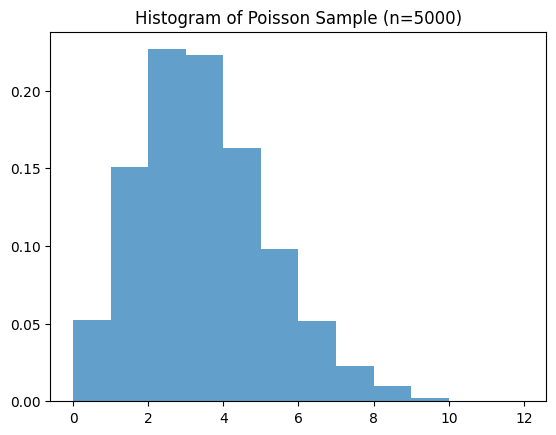

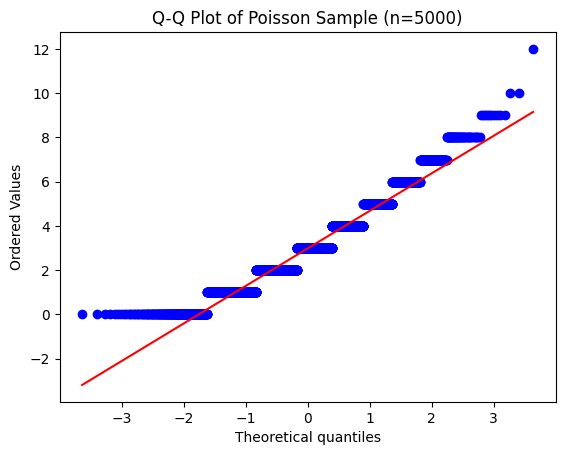

Shapiro-Wilk Test (n=5000):
Statistic: 0.9492355585098267
P-value: 1.7393666233878043e-38

The p-value is less than 0.05. We can conclude that the sample does not follow a normal distribution.



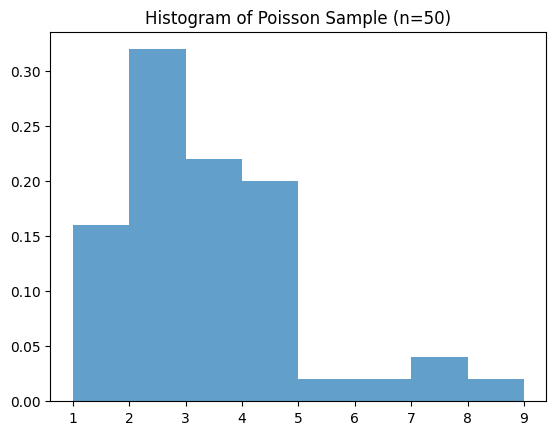

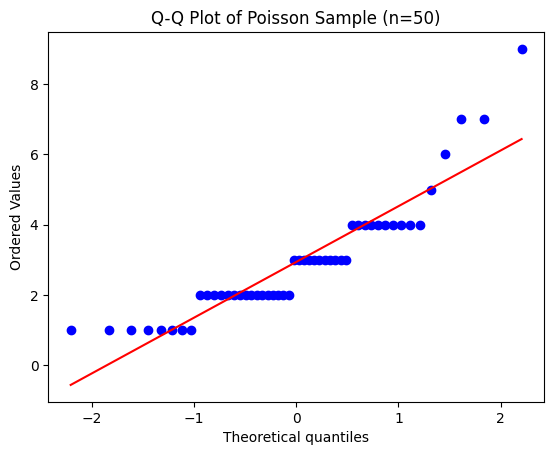

Shapiro-Wilk Test (n=50):
Statistic: 0.8475146293640137
P-value: 1.3259515071695205e-05

The p-value is less than 0.05. We can conclude that the sample does not follow a normal distribution.



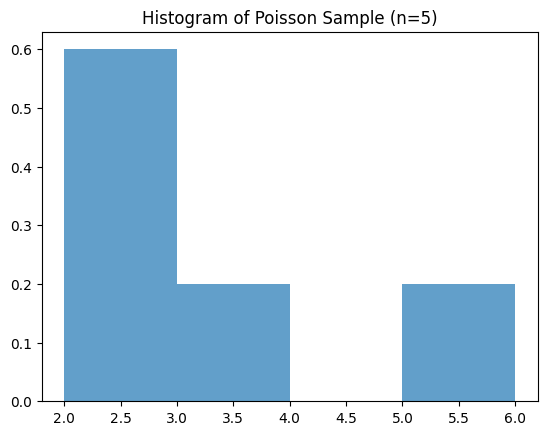

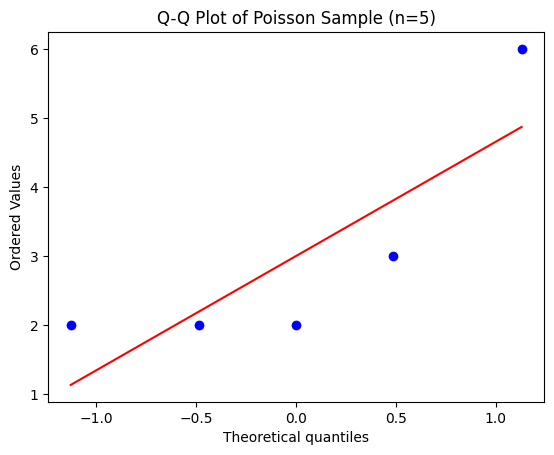

Shapiro-Wilk Test (n=5):
Statistic: 0.7007933259010315
P-value: 0.009761146269738674

The p-value is less than 0.05. We can conclude that the sample does not follow a normal distribution.



In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


np.random.seed(810109203)

lambda_val = 3
sample_sizes = [5000, 50, 5]

for n in sample_sizes:
    sample = np.random.poisson(lambda_val, n)

    plt.hist(sample, bins=np.arange(sample.min(), sample.max()+1), alpha=0.7, density=True)
    plt.title(f'Histogram of Poisson Sample (n={n})')
    plt.show()

    stats.probplot(sample, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of Poisson Sample (n={n})')
    plt.show()
    statistic, p_value = stats.shapiro(sample)
    print(f"Shapiro-Wilk Test (n={n}):\nStatistic: {statistic}\nP-value: {p_value}\n")
    if p_value < 0.05:
        print("The p-value is less than 0.05. We can conclude that the sample does not follow a normal distribution.\n")
    else:
        print("The p-value is greater than 0.05. We cannot reject the null hypothesis that the sample follows a normal distribution.\n")
